### import libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

from plots import (
    plot_gains_curve,
    plot_outcome_by_day,
    pl_distribution,
    boxplot_DoW,
    risk_vs_reward_scatter,
    heatmap_rr
)

#### load dataframe

In [2]:
df = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQL7L-HMzezpuFCDOuS0wdUm81zbX4iVOokaFUGonVR1XkhS6CeDl1gHUrW4U0Le4zihfpqSDphTu4I/pub?gid=212787870&single=true&output=csv")

In [3]:
df.head()

,date,symbol,entry_time,entry_exit,outcome,risk_by_percentage,pl_by_rr,pl_by_percentage
0,01-24-2024,MNQ,9:20:00,9:20:00,LOSS,1.00%,-1.0,-1.00%
1,11-12-2024,MNQ,9:12:00,10:12:00,WIN,1.00%,1.6,1.60%
2,11-18-2024,MNQ,9:23:00,10:23:00,LOSS,1.00%,-1.0,-1.00%
3,11-19-2024,MNQ,9:54:00,10:54:00,WIN,1.00%,0.0,0.00%
4,11-20-2024,MNQ,9:54:00,10:54:00,BE,1.00%,0.3,0.30%


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                44 non-null     object 
 1   symbol              44 non-null     object 
 2   entry_time          44 non-null     object 
 3   entry_exit          44 non-null     object 
 4   outcome             44 non-null     object 
 5   risk_by_percentage  44 non-null     object 
 6   pl_by_rr            44 non-null     float64
 7   pl_by_percentage    44 non-null     object 
dtypes: float64(1), object(7)
memory usage: 2.9+ KB


### Clean data & Calculate stats

In [14]:
def calc_stats(df):
    required_cols = ["date", "outcome", "pl_by_percentage", "risk_by_percentage", "entry_time", "pl_by_rr"]
    if not all(col in df.columns for col in required_cols):
        raise ValueError(f"Missing required columns: {', '.join(required_cols)}")

    # Overall Stats
    wins = df["outcome"].value_counts().get("WIN", 0)
    losses = df["outcome"].value_counts().get("LOSS", 0)
    winrate = (wins / (wins + losses)) * 100 if (wins + losses) > 0 else 0.0
    total_trades = len(df)
    pl_raw = (
        df["pl_by_percentage"].str.replace("%", "").astype(float)
        if df["pl_by_percentage"].dtype == "object"
        else df["pl_by_percentage"] * 100
    )
    pl = pl_raw.cumsum()
    total_pl = pl_raw.sum()
    avg_win = pl_raw[pl_raw > 0].mean() or 0
    avg_loss = pl_raw[pl_raw < 0].mean() or 0
    risk_converted = (
        df["risk_by_percentage"].str.replace("%", "").astype(float)
        if df["risk_by_percentage"].dtype == "object"
        else df["risk_by_percentage"] * 100
    )
    avg_risk = risk_converted.mean() or 0
    avg_rr = df["pl_by_rr"].mean() or 0
    best_trade = pl_raw.max() or 0
    worst_trade = pl_raw.min() or 0
    df["peak"] = pl_raw.cummax()
    df["drawdown"] = (df["peak"] - pl_raw) / df["peak"]
    max_dd = df["drawdown"].max() or 0

    stats = {
    "Total Trades": f"{len(df)}",
    "Win Rate": f"{winrate:.2f}%",
    "Total P/L": f"{total_pl:.2f}%",
    "Avg Win": f"{avg_win:.2f}%",
    "Avg Loss": f"{avg_loss:.2f}%",
    "Avg Risk": f"{avg_risk:.2f}%",
    "Avg R/R": f"{avg_rr:.2f}",
    "Best Trade": f"{best_trade:.2f}%",
    "Worst Trade": f"{worst_trade:.2f}%",
    "Max DD": f"{max_dd:.2f}%"
    }
    stats_display = "\n".join(f"{label:<16} {value:>6}" for label, value in stats.items())
    return pl, pl_raw, f"\n Overall Statistics:\n{stats_display}"

### display_stats

In [15]:
pl, pl_raw, stats = calc_stats(df)
print(stats)


 Overall Statistics:
Total Trades         44
Win Rate         84.38%
Total P/L        40.20%
Avg Win           1.41%
Avg Loss         -1.00%
Avg Risk          0.95%
Avg R/R            0.93
Best Trade        2.40%
Worst Trade      -1.00%
Max DD            1.62%


### Visualizations

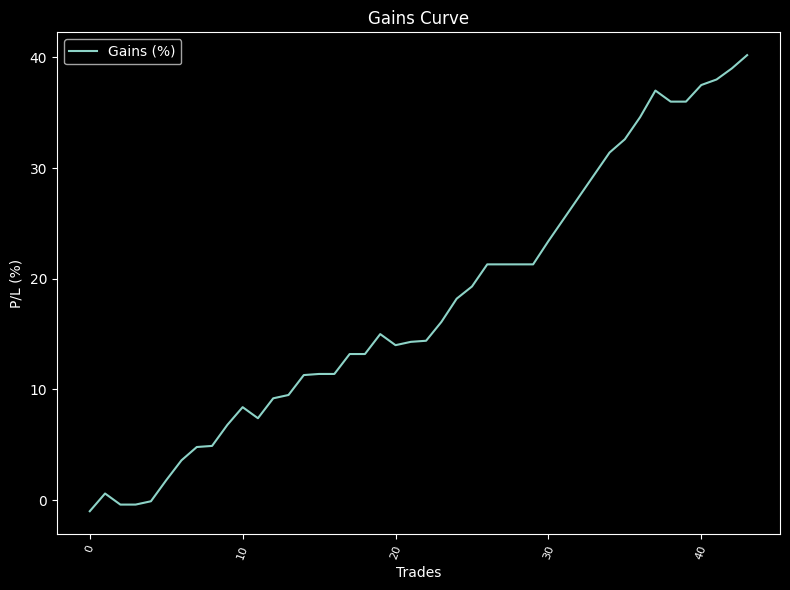

In [13]:
plot_gains_curve(df, pl)
plt.show()

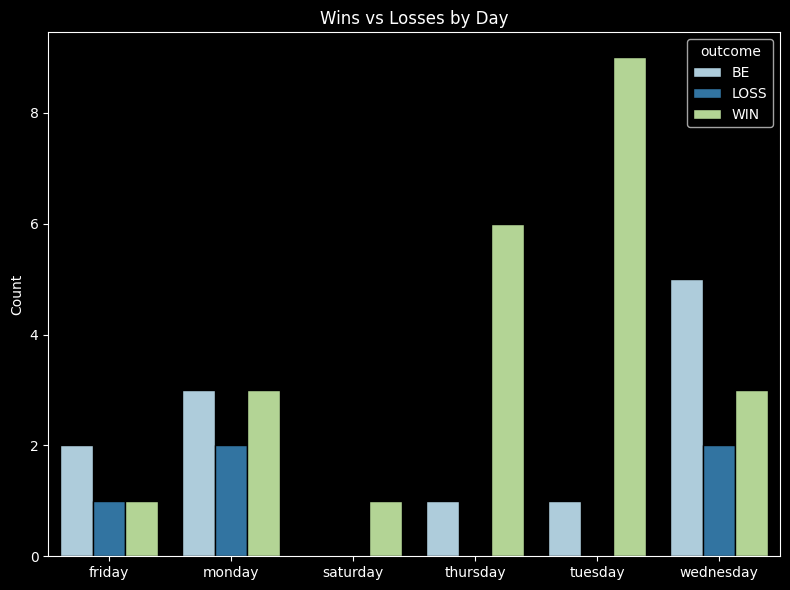

In [8]:
plot_outcome_by_day(df)
plt.show()

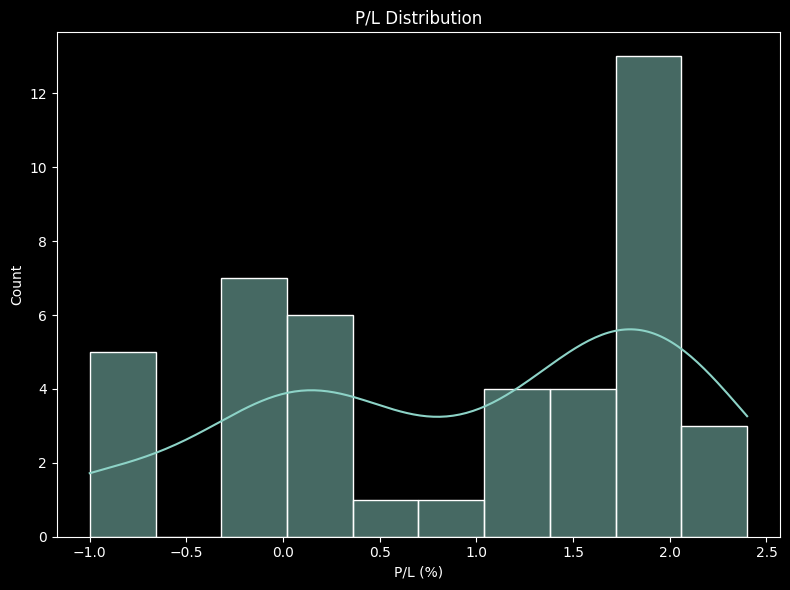

In [9]:
pl_distribution(pl_raw)
plt.show()

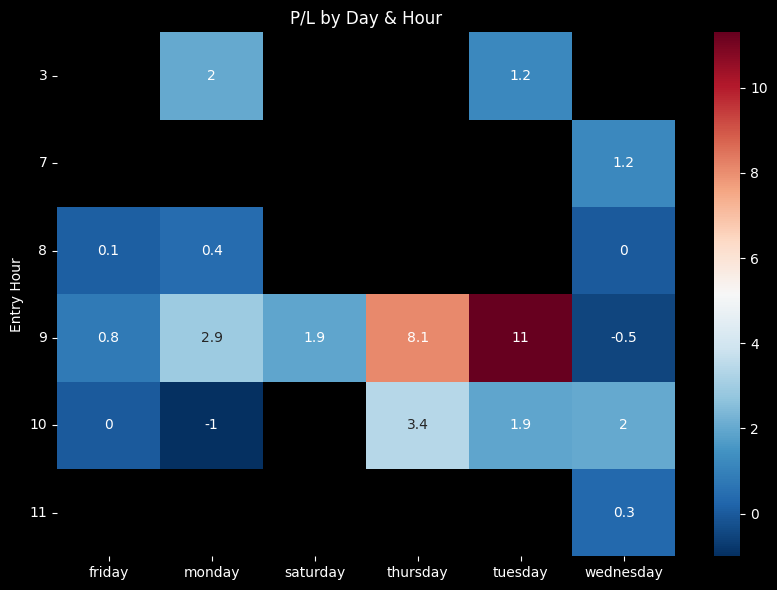

In [10]:
heatmap_rr(df)
plt.show()

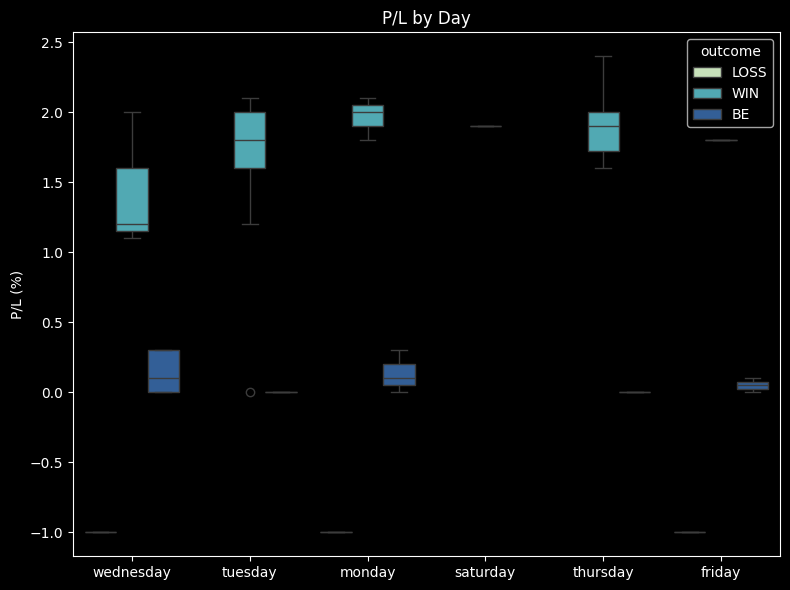

In [11]:
boxplot_DoW(df, pl_raw)
plt.show()

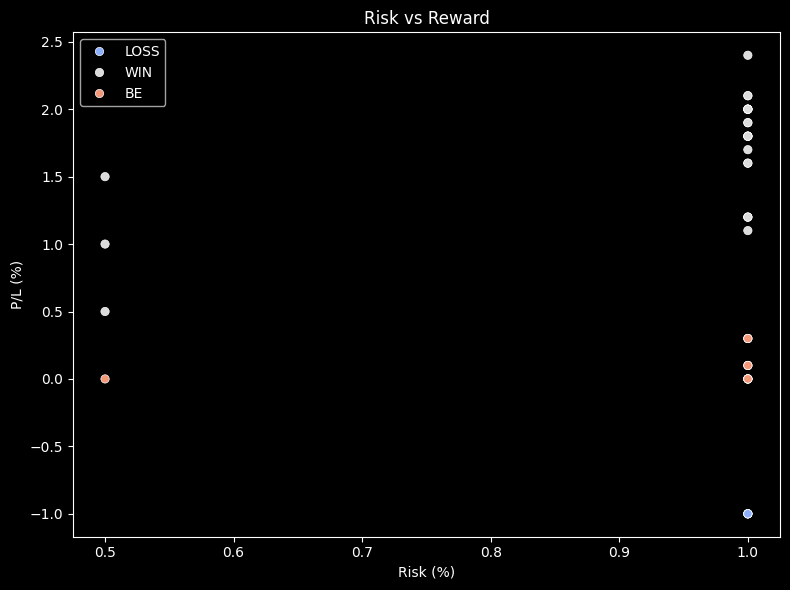

In [12]:
risk_vs_reward_scatter(df, pl_raw)
plt.show()